# Project Scope
## Aims
* To present a report on the biodiversity and conservation status of various endangered species
* To see if there are any patterns or themes to the types of species that become endangered
* To share the findings with relevant authorities

## Questions
1. Which types of species are most endangered?
2. Which are least endangered?
3. What impacts the most on a species being endangered?
4. What measures can be taken to reduce the level of endangerment to these species?


In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)

In [11]:
#import data
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")
#print("Observations")
#print(observations.head(20))
#print("Species Info")


species_info.dropna(inplace=True, axis=0)
#print(species_info.head(20))

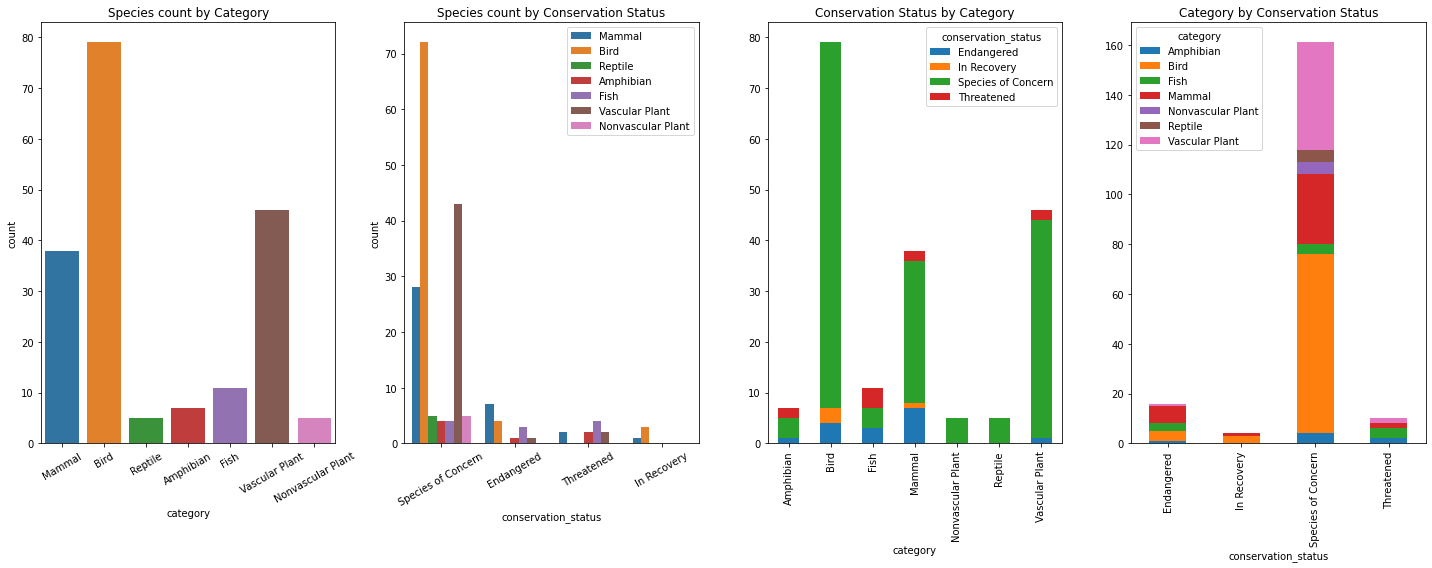

In [14]:
#species info data analysis
fig, axs = plt.subplots(1,4, figsize=(20, 8))


#type of each species
sns.countplot(x="category", data=species_info, ax=axs[0])
axs[0].set_xticks(range(0, len(species_info.category.unique())))
axs[0].set_xticklabels(species_info.category.unique(), rotation=30)
axs[0].set_title("Species count by Category")

#count of conservation status
sns.countplot(x="conservation_status", data=species_info, ax=axs[1], hue="category")
axs[1].set_xticks(range(0, len(species_info.conservation_status.unique())))
axs[1].set_xticklabels(species_info.conservation_status.unique(), rotation=30)
axs[1].set_title("Species count by Conservation Status")
axs[1].legend(loc="upper right")



#print(species_info.conservation_status.value_counts().to_list())

#stacked bars of categories
agg_data = species_info.groupby(by=["category", "conservation_status"])["scientific_name"].count().unstack().fillna(0)
#print(agg_data)

agg_data.plot(kind="bar", stacked=True, ax=axs[2])
axs[2].set_title("Conservation Status by Category")


#stacked bars by status
agg_data_2 = species_info.groupby(by=["conservation_status", "category"])["scientific_name"].count().unstack().fillna(0)
agg_data_2.plot(kind="bar", stacked=True, ax=axs[3])
axs[3].set_title("Category by Conservation Status")

plt.tight_layout()
plt.show()

In [15]:
#observation data
#print(observations.head(30))

by_park = observations.groupby(by="park_name", as_index=False).observations.sum()
#print(by_park)


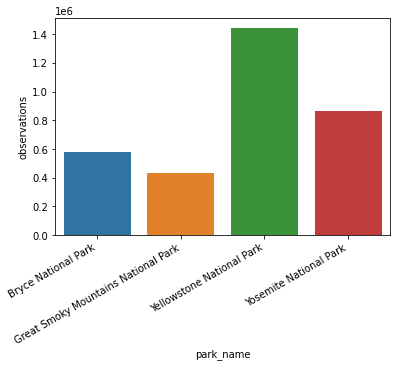

<Figure size 432x288 with 0 Axes>

In [6]:
#observations by park
sns.barplot(x="park_name", y="observations", data=by_park)
plt.xticks(rotation=30, ha="right")
plt.show()
plt.clf()


In [16]:
#most observed animal
by_animal = observations.groupby(by="scientific_name", as_index=False).observations.sum()

#print(by_animal)


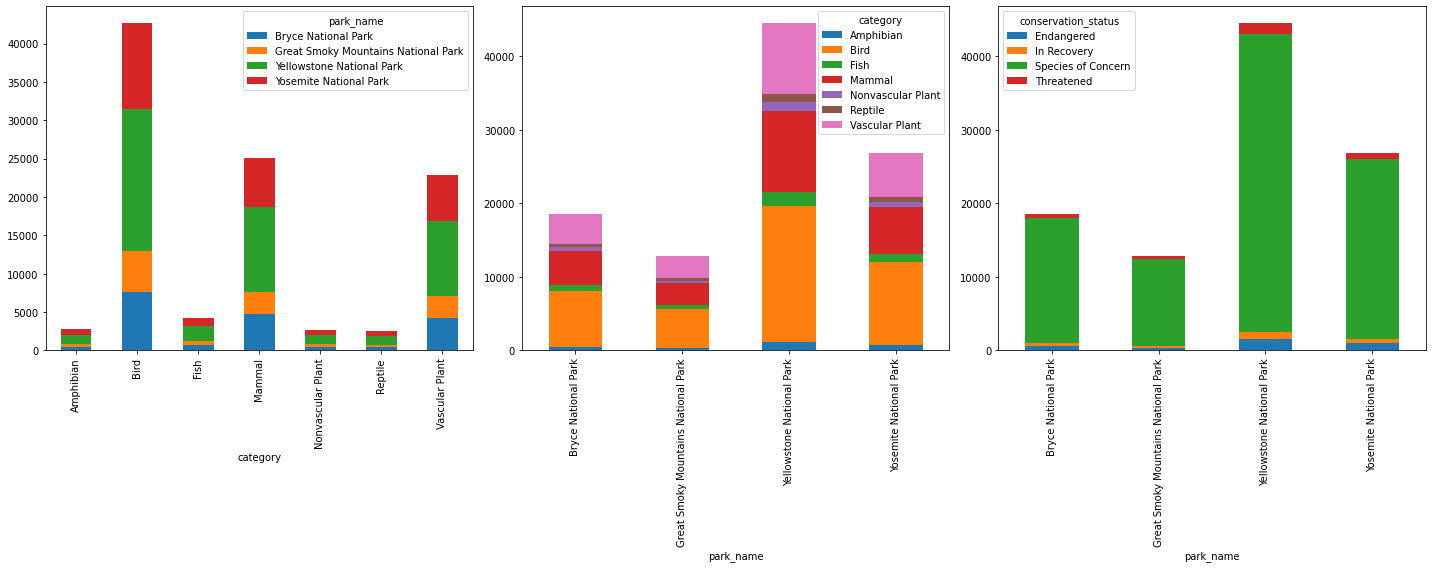

In [8]:
#merge dfs

merged = pd.merge(species_info, observations, how="left", on="scientific_name")

agg_merged = merged.groupby(by=["category", "park_name"])["observations"].sum().unstack().fillna(0)

fig, axs = plt.subplots(1, 3, figsize=(20, 8))

agg_merged.plot(kind="bar", stacked=True, ax=axs[0])


agg_merged_2 = merged.groupby(by=["park_name", "category"])["observations"].sum().unstack().fillna(0)
agg_merged_2.plot(kind="bar", stacked=True, ax=axs[1])

agg_merged_3 = merged.groupby(["park_name", "conservation_status"])["observations"].sum().unstack().fillna(0)
agg_merged_3.plot(kind="bar", stacked=True, ax=axs[2])

plt.tight_layout()
plt.show()

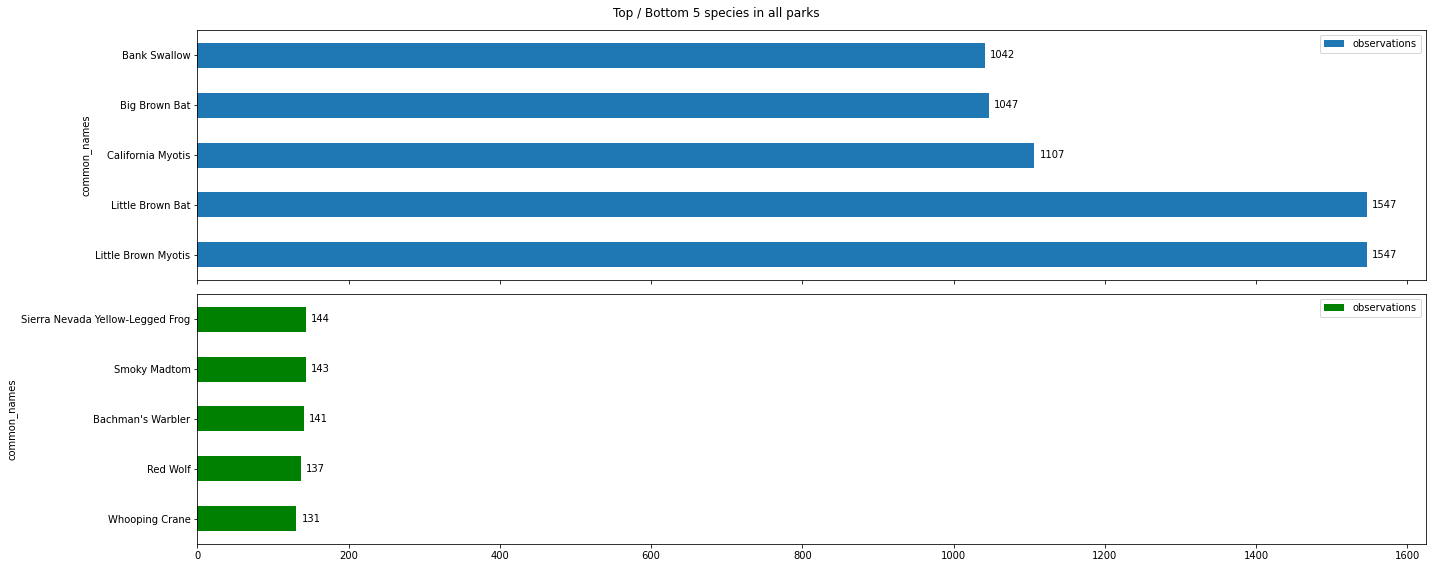

In [9]:
#by common name

by_common_name = merged.groupby(by="common_names", as_index=False)["observations"].sum().fillna(0)
by_common_name["common_names"] = by_common_name["common_names"].apply(lambda x: x.split(",")[0])
by_common_name.drop_duplicates(subset="common_names", keep="first", inplace=True)
by_common_name.set_index("common_names", inplace=True)



#5 most/least common animals in all parks
fig, axs = plt.subplots(2, figsize=(20, 8), sharex=True)
fig.suptitle("Top / Bottom 5 species in all parks")

top_5 = by_common_name.sort_values(by="observations", ascending=False)[:5]
top_5.plot(kind="barh", ax=axs[0])

bottom_5 = by_common_name.sort_values(by="observations", ascending=True)[:5]
bottom_5.plot(kind="barh", ax=axs[1], color="green")


axs[0].bar_label(axs[0].containers[0], padding=5)
axs[1].bar_label(axs[1].containers[0], padding=5)
plt.tight_layout()
plt.show()

# Observations
* Yellowstone had the most observations and also has the highest percentage of endangered species
* All parks have a lot of species of concern
* Birds are the most common species in all parks, generally followed by mammals, except in Yellowstone where vascular plants are the second-largest population
* There are more endangered mammals than any other species
* Birds are making the fastest recovery
* Bats appear to be the most common species
* The Whooping Crane has been the least observed of all animals with only 131 observations across all parks